In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from datetime import timedelta
import holidays
%matplotlib inline

In [2]:
# check current directory
%pwd 

'C:\\Users\\Haiyan\\Google Drive\\DataScience\\Python\\Data_Scientist_Nanodegree\\1_Project1_Airbnb'

In [3]:
# set working directory
%cd "C:\Users\Haiyan\Google Drive\DataScience\Python\Data_Scientist_Nanodegree\1_Project1_Airbnb"

C:\Users\Haiyan\Google Drive\DataScience\Python\Data_Scientist_Nanodegree\1_Project1_Airbnb


In [4]:
# read datasets
listings = pd.read_csv('seattle\listings.csv')

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings.shape

(3818, 92)

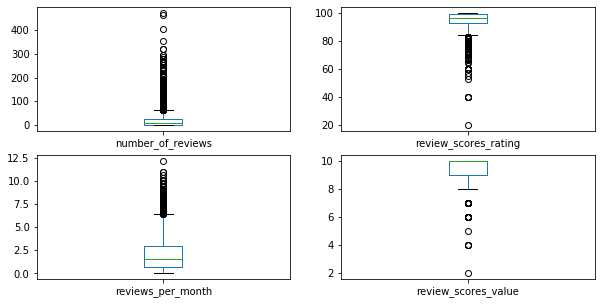

In [7]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
listings['number_of_reviews'].plot(kind = 'box');

plt.subplot(2, 2, 3)
listings['reviews_per_month'].plot(kind = 'box');

plt.subplot(2, 2, 2)
listings['review_scores_rating'].plot(kind = 'box'); 

plt.subplot(2, 2, 4)
listings['review_scores_value'].plot(kind = 'box');

In [8]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

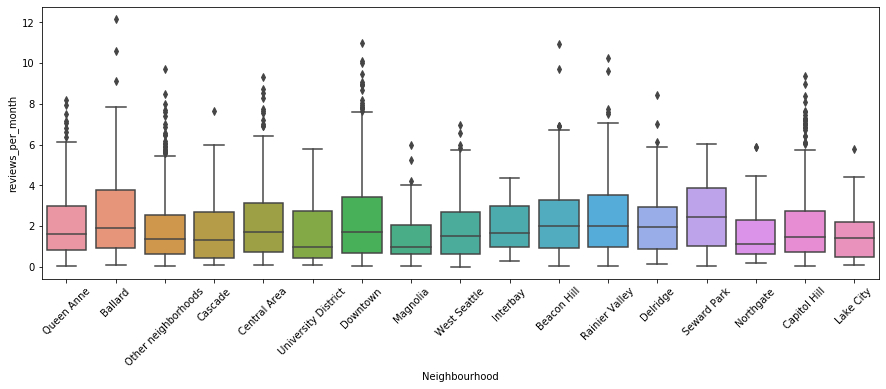

In [9]:
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'reviews_per_month', 
                data = listings);
plt.setp(ax.get_xticklabels(), rotation=45);
plt.xlabel('Neighbourhood');

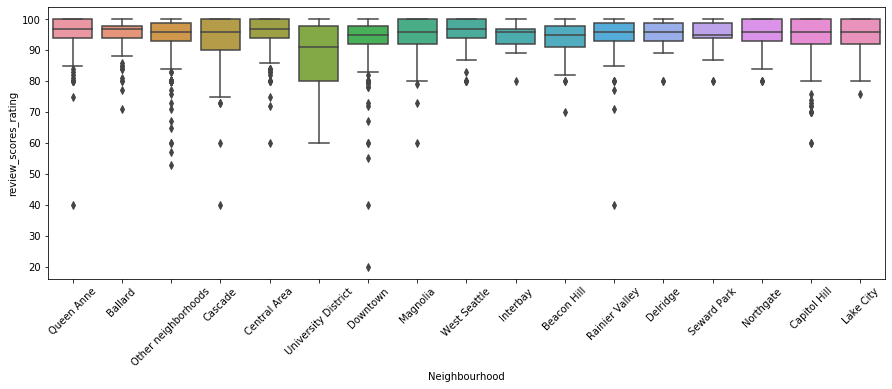

In [10]:
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'review_scores_rating', 
                data = listings);
plt.setp(ax.get_xticklabels(), rotation=45);
plt.xlabel('Neighbourhood');

In [11]:
# Read calendar price data
price = pd.read_csv('seattle\calendar.csv')

In [12]:
price.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
price.shape

(1393570, 4)

In [14]:
price.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [15]:
# Convert object date to datetime to analyze prices over time
price['date'] =  pd.to_datetime(price['date'], format = '%Y-%m-%d')

In [16]:
price['date'].min(), price['date'].max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2017-01-02 00:00:00'))

In [17]:
# Remove special characters from price column
price['price'] = pd.to_numeric(price['price'].str.translate(str.maketrans({'$': '', ',': ''})))

In [18]:
price.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [19]:
price[price['available'] == 't'].sample(n = 5)

,listing_id,date,available,price
282003,7988337,2016-08-14,t,115.0
656115,8538630,2016-08-01,t,150.0
217203,9095510,2016-02-01,t,109.0
525793,4661374,2016-07-15,t,89.0
218493,1256883,2016-08-14,t,99.0


In [20]:
price.sort_values(by = ['date', 'available','listing_id'], inplace = True, ascending = False)

In [175]:
price['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

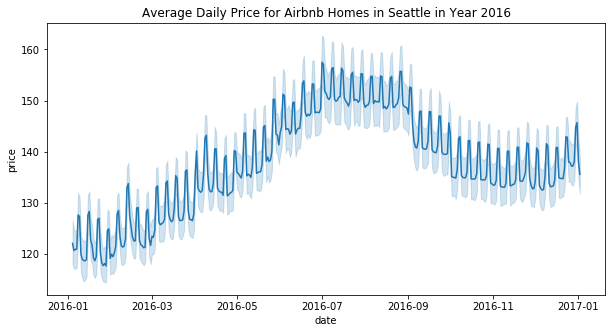

In [26]:
# 1. How does nightly average price change in year 2016?
fig = plt.subplots(figsize = (10,5))
sns.lineplot(x = 'date', y = 'price', data = price[price['available'] == 't'], n_boot = 500);
plt.title('Average Daily Price for Airbnb Homes in Seattle in Year 2016');
plt.savefig('avg_daily_price_2016.png');

In [27]:
price['year-month'] = price['date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [29]:
monthly_avg_price = price.groupby('year-month')['price'].mean()
monthly_avg_price

month-year
2016-01    121.568409
2016-02    124.293927
2016-03    128.644488
2016-04    135.097005
2016-05    139.538183
2016-06    147.473137
2016-07    152.094150
2016-08    150.656594
2016-09    143.255949
2016-10    137.031939
2016-11    135.688738
2016-12    137.251835
2017-01    136.882590
Name: price, dtype: float64

In [30]:
(monthly_avg_price[-1] - monthly_avg_price[0]), (monthly_avg_price[-1] - monthly_avg_price[0]) / monthly_avg_price[0] *100

(15.314181057652434, 12.597171537154395)

Average daily price for Airbnb homes in Seattle increased steadily from January to July 2016, then started to descrease slowly until September. In September, the average price dropped a lot suddenly and then kept on decreasing until December, after which the price started to increase again and maintained at a level higher than that in January 2016. Overall, Airbnb home prices in Seattle increased year over year from 2016 to 2017 for 12.6%.  

In [28]:
price.sample(n = 5)

,listing_id,date,available,price,month-year
1232839,4947002,2016-08-25,t,175.0,2016-08
1376703,430609,2016-10-18,t,630.0,2016-10
1067684,1198884,2016-03-03,f,NaN,2016-03
626593,7533537,2016-09-13,t,95.0,2016-09
1038404,7308331,2016-12-13,f,NaN,2016-12


In [303]:
# 2. How do Airbnb prices respond to national holidays? How much do they differ from normal daily average? 
holidays_2016 = pd.DataFrame.from_dict(data = holidays.US(years = 2016), orient = 'index').reset_index()
holidays_2016.drop(0, axis = 0, inplace = True)  # Price data starts from 2016-01-04
holidays_2016.columns = ['date', 'holiday']
holidays_2016['date'] = pd.to_datetime(holidays_2016['date'])  # convert to datetime type to merge with price data below
holidays_2016

,date,holiday
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day
5,2016-09-05,Labor Day
6,2016-10-10,Columbus Day
7,2016-11-11,Veterans Day
8,2016-11-24,Thanksgiving
9,2016-12-25,Christmas Day
10,2016-12-26,Christmas Day (Observed)


In [304]:
# Decide the holiday week days before and after the holiday
holidays_2016['week_b4_holiday'] = holidays_2016.loc[holidays_2016['holiday'].notnull(), 'date'] + timedelta(days = -5)
holidays_2016['week_after_holiday'] = holidays_2016.loc[holidays_2016['holiday'].notnull(), 'date'] + timedelta(days = 5)

In [305]:
holidays_2016

,date,holiday,7day_b4_holiday,7day_after_holiday
1,2016-01-18,Martin Luther King Jr. Day,2016-01-15,2016-01-21
2,2016-02-15,Washington's Birthday,2016-02-12,2016-02-18
3,2016-05-30,Memorial Day,2016-05-27,2016-06-02
4,2016-07-04,Independence Day,2016-07-01,2016-07-07
5,2016-09-05,Labor Day,2016-09-02,2016-09-08
6,2016-10-10,Columbus Day,2016-10-07,2016-10-13
7,2016-11-11,Veterans Day,2016-11-08,2016-11-14
8,2016-11-24,Thanksgiving,2016-11-21,2016-11-27
9,2016-12-25,Christmas Day,2016-12-22,2016-12-28
10,2016-12-26,Christmas Day (Observed),2016-12-23,2016-12-29


In [306]:
price_holiday = price.merge(holidays_2016, how = 'outer', on = 'date').sort_values(by = ['date'])

In [307]:
# Backward and forward fill the holiday week dates
price_holiday['week_b4_holiday'].fillna(method = 'bfill', inplace= True)
price_holiday['week_after_holiday'].fillna(method = 'ffill', inplace= True)

In [308]:
# Decide whether a specific day is in a holiday week
price_holiday.loc[(price_holiday['date'] < price_holiday['week_b4_holiday']) & (price_holiday['week_after_holiday'].isnull()), 
                  'holiday_week'] = 0  # earliest days in 2016

price_holiday.loc[(price_holiday['week_b4_holiday'].isnull()) & (price_holiday['date'] <= price_holiday['week_after_holiday']), 
                  'holiday_week'] = 1  # earlist days in 2017

price_holiday.loc[(price_holiday['date'] >= price_holiday['week_b4_holiday']) 
                  | (price_holiday['date'] <= price_holiday['week_after_holiday']), 
                  'holiday_week'] = 1  # days between two holidays

price_holiday.loc[price_holiday['holiday_week'].isnull(), 'holiday_week'] = 0 # days after one holiday and before the next one

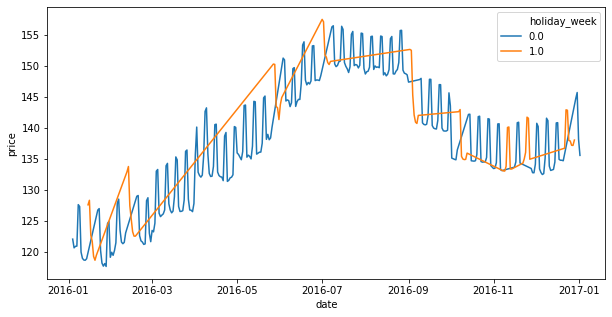

In [314]:
# Plot the average daily prices by holiday week
fig = plt.subplots(figsize = (10,5))
sns.lineplot(x = 'date', y = 'price', hue = 'holiday_week', ci= None, n_boot = 500, 
             data = price_holiday);

In [315]:
# Check exact average prices in holiday weeks for each holiday
price_by_holiday_month = price_holiday.groupby(['holiday_week', 'year-month'])['price'].mean().reset_index()

In [318]:
price_by_month_holiday = pd.pivot_table(price_by_holiday_month, values = 'price', index = 'year-month', columns = ['holiday_week'])
price_by_month_holiday['diff'] = price_by_month_holiday[1.0] - price_by_month_holiday[0.0]
price_by_month_holiday

holiday_week,0.0,1.0,diff
month-year,,,
2016-01,121.305237,122.339748,1.034511
2016-02,123.513551,126.770120,3.256568
2016-03,128.644488,NaN,NaN
2016-04,135.097005,NaN,NaN
2016-05,138.354177,145.703873,7.349697
2016-06,147.698706,144.312148,-3.386558
2016-07,151.913883,152.719213,0.805329
2016-08,150.656594,NaN,NaN
2016-09,142.691965,145.140152,2.448187


Average daily home prices are slightly higher during holiday weeks than normal weeks, but the difference is barely noticeable. 

In [325]:
# 3. Merge price data with listings data to analyze price by neighbourhood
price_region = price.merge(listings, left_on = 'listing_id', right_on = 'id')

In [365]:
# only keep variables needed for analysis
price_region_type = price_region[['id', 'date', 'year-month', 'available', 'price_x', 'neighbourhood_group_cleansed', 'zipcode', 'property_type',
 'room_type', 'accommodates']]

In [421]:
price_region_type.loc[price_region_type[price_region_type['zipcode'] == '99\n98122'].index, 'zipcode'] = '98122'

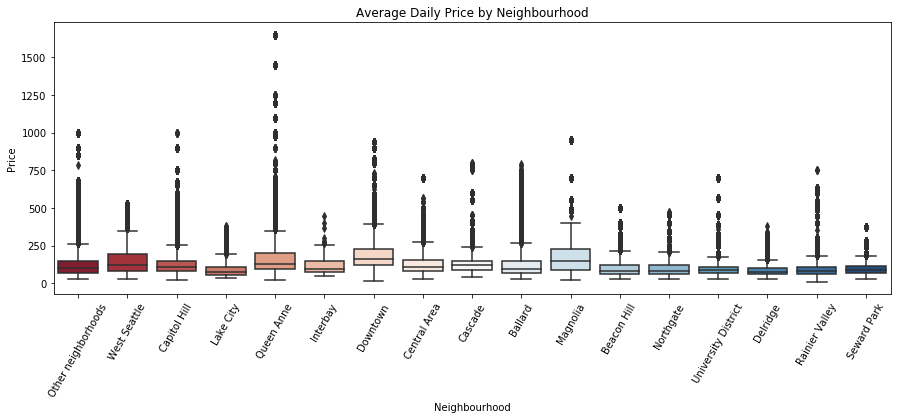

In [360]:
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price_x', palette = "RdBu", 
             data = price_region_type[price_region_type['available'] == 't']);
plt.setp(ax.get_xticklabels(), rotation=60);
plt.xlabel('Neighbourhood');
plt.ylabel('Price');
plt.title('Average Daily Price by Neighbourhood');

In [374]:
# Get exact average monthly prices by neighborhood
avg_price_region = price_region_type[price_region_type['available'] == 't'].groupby(['year-month', 'neighbourhood_group_cleansed'])['price_x'].mean().sort_values(ascending = False).reset_index().sort_values(by = ['year-month', 'price_x'])

In [380]:
# Reshape the average monthly price data into wide shape
avg_price_region_wide = pd.pivot_table(avg_price_region, values = 'price_x', index = 'neighbourhood_group_cleansed', columns = ['year-month']).round(0)
avg_price_region_wide.sort_values(by = '2016-01', ascending = False)

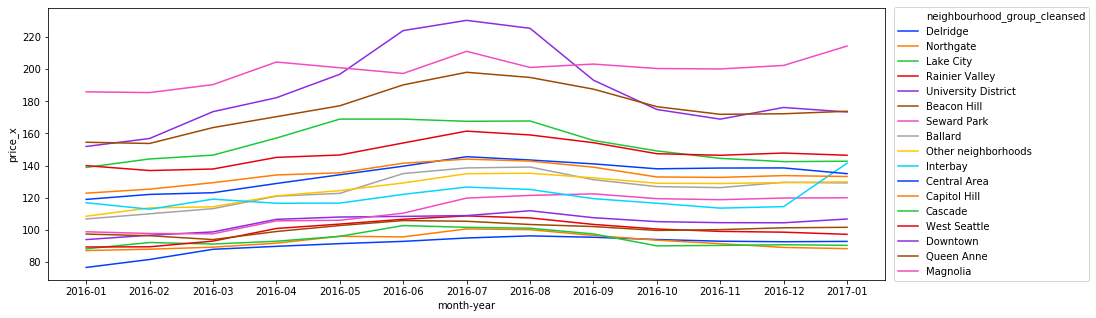

In [408]:
# Visaulize the monthly average prices by neighborhood
fig = plt.subplots(figsize = (15,5))
sns.lineplot(x = 'year-month', y = 'price_x', hue = 'neighbourhood_group_cleansed', palette = "bright", ci= None, n_boot = 100,
             data = avg_price_region);
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1);  # move legend outside figure

Magnolia, Downtown, and Queen Anne are the most expensive neighborhoods in Seattle throughout year 2016. Airbnb home prices in Downtown were the highest during May to September, while those in Magnolia neighborhood were the highest in all months except this period. Lake City, Northgate, and Delridge were the cheapest neighborhoods in Seattle. 

In [424]:
# Compare prices across zipcode
print(price_region_type['zipcode'].drop_duplicates().count())

# Get exact average monthly prices by neighborhood
avg_price_zipcode = price_region_type[price_region_type['available'] == 't'].groupby(['month-year', 'zipcode'])['price_x'].mean().sort_values(ascending = False).reset_index().sort_values(by = ['month-year', 'price_x'])

27


In [426]:
# Reshape the average monthly price data by zipcode into wide shape
avg_price_zipcode_wide = pd.pivot_table(avg_price_zipcode, values = 'price_x', index = 'zipcode', columns = ['month-year']).round(0)
avg_price_zipcode_wide.sort_values(by = '2016-01', ascending = False)

month-year,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
zipcode,,,,,,,,,,,,,
98134,198.0,199.0,198.0,199.0,210.0,218.0,216.0,216.0,211.0,199.0,198.0,199.0,192.0
98199,181.0,180.0,183.0,196.0,193.0,190.0,204.0,194.0,195.0,193.0,193.0,195.0,211.0
98101,162.0,171.0,191.0,193.0,209.0,230.0,247.0,244.0,208.0,191.0,182.0,191.0,193.0
98109,161.0,158.0,164.0,173.0,183.0,188.0,192.0,188.0,181.0,168.0,162.0,161.0,165.0
98121,151.0,154.0,176.0,189.0,206.0,256.0,259.0,251.0,200.0,177.0,174.0,183.0,174.0
98119,150.0,151.0,166.0,169.0,177.0,195.0,204.0,203.0,197.0,189.0,183.0,183.0,181.0
98136,144.0,143.0,138.0,139.0,137.0,139.0,138.0,139.0,143.0,140.0,138.0,141.0,144.0
98104,140.0,141.0,146.0,157.0,163.0,157.0,161.0,161.0,157.0,142.0,142.0,142.0,143.0
98116,139.0,135.0,140.0,148.0,151.0,159.0,171.0,169.0,161.0,152.0,152.0,154.0,151.0


98134, 98199, and 98101 are the most expensive zipcodes in Seattle throughout year 2016. 98106, 98133, and 98146 were the cheapest zipcodes in Seattle. 

In [453]:
# 4. How long are the houses listed on Airbnb a year and how has that changed over time?

In [454]:
# 5. What types of homes are listed on Airbnb? Hotel, motel, single family homes, apartments or other types?
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64